In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales_suco_transformed = pd.read_pickle('../data/sales_suco_transformed.pkl')

In [3]:
reg_lin_sklearn = LinearRegression()
reg_lin_sklearn.fit(sales_suco_transformed[['vendas_ontem']], sales_suco_transformed['vendas'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [4]:
def linear_regression(X, y):
    
    X = np.array(X).reshape((-1))
    y = np.array(y).reshape((-1))
    

    intercept_vals = np.arange(1, 255, 1)
    coef_vals = np.arange(0, 5, 0.1)
    best_sae = 10000

    for intercept in intercept_vals:
        for coef in coef_vals:
            y_pred = intercept + coef * X
            sae = np.abs(y_pred - y).sum()
            if sae < best_sae:
                best_sae = sae
                best_intercept = intercept
                best_coef = coef

    return (float(best_intercept), float(best_coef))


In [5]:
intercept, coef = linear_regression(sales_suco_transformed[['vendas_ontem']], sales_suco_transformed['vendas'])

In [6]:
y_pred_sklearn = reg_lin_sklearn.predict(sales_suco_transformed[['vendas_ontem']])

In [7]:
y_pred = intercept + coef * sales_suco_transformed[['vendas_ontem']]

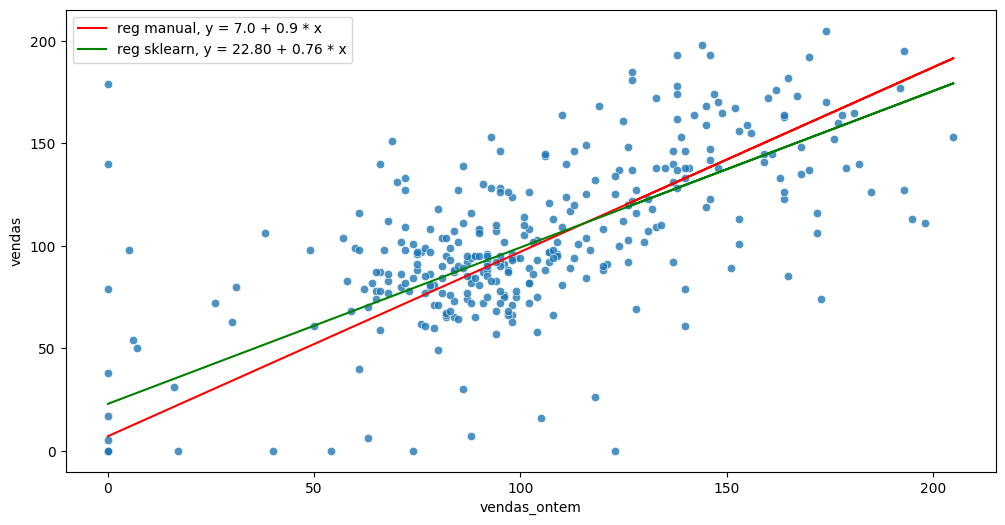

In [8]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='vendas_ontem', y='vendas', data=sales_suco_transformed, alpha=0.8)
plt.plot(sales_suco_transformed['vendas_ontem'], y_pred, color='red', label=f'reg manual, y = {intercept} + {coef} * x')
plt.plot(sales_suco_transformed['vendas_ontem'], y_pred_sklearn, color='green', label=f'reg sklearn, y = {reg_lin_sklearn.intercept_:.2f} + {reg_lin_sklearn.coef_[0]:.2f} * x')
plt.legend()